In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Вивчіть галерею [matplotlib](https://matplotlib.org/3.1.1/gallery/index.html) та галерею [seaborn](https://seaborn.pydata.org/examples/index.html), щоб побачити більше типів візуалізації та інші можливості побудови графіків. Для наступних вправ завантажте цей [набір даних рейтингу кави](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv) та створіть візуалізацію, щоб відповісти на запитання.

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv')
data.head(5)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [16]:
data['species'].unique()

array(['Arabica', 'Robusta'], dtype=object)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1182 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

In [18]:
data.isnull().sum()

total_cup_points            0
species                     0
owner                       7
country_of_origin           1
farm_name                 359
lot_number               1063
mill                      318
ico_number                157
company                   209
altitude                  226
region                     59
producer                  232
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               47
grading_date                0
owner_1                     7
variety                   226
processing_method         170
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
moisture                    0
category_one_defects        0
quakers                     1
color     

### 2. Які країни є великими експортерами кави?

In [19]:
filtered_data = data.groupby('country_of_origin', as_index=False).sum('total_cup_points')
filtered_data.head()

,country_of_origin,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Brazil,10877.58,30534,997.01,999.71,982.15,991.51,995.88,994.16,1304.81,1300.66,1313.32,998.31,10.87,17,59.0,475,106047.0,107475.0,106761.0
1,Burundi,163.66,520,14.83,14.92,14.50,14.83,14.58,14.83,20.00,20.00,20.00,15.16,0.12,0,0.0,5,3580.0,3580.0,3580.0
2,China,1326.84,55,122.26,122.01,119.75,121.25,121.18,120.77,159.33,159.33,158.66,122.35,1.51,0,8.0,64,23410.0,23410.0,23410.0
3,Colombia,15208.50,41204,1400.51,1390.27,1377.02,1383.48,1392.54,1410.64,1818.00,1820.00,1821.34,1394.56,11.35,69,38.0,355,227346.0,248346.0,237846.0
4,Costa Rica,4222.24,10354,391.24,384.40,384.26,386.27,384.41,389.50,502.67,503.33,505.33,390.84,4.25,18,6.0,144,62132.6,64839.8,63486.2


Text(0.5, 1.0, 'exporters')

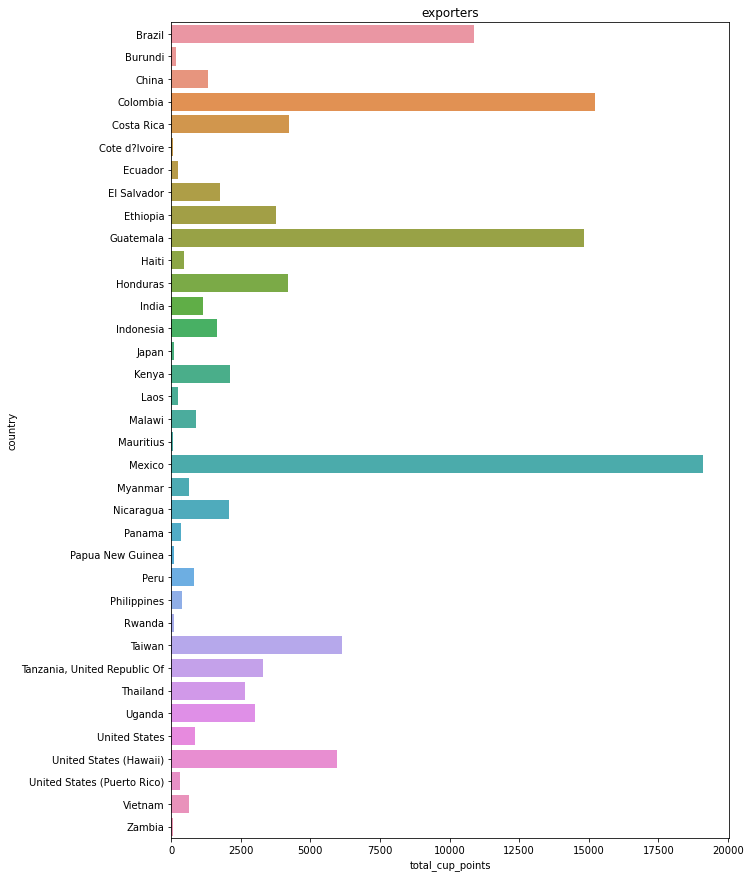

In [20]:
plt.figure(figsize=(10,15))

sns.barplot(y='country_of_origin', x='total_cup_points',  data=filtered_data)
plt.ylabel('country')
plt.title('exporters')

### 3. Які кореляції між різними показниками оцінки кави?

In [21]:
data_of_grade = data.loc[:,['aroma','flavor','aftertaste','acidity','body','balance','uniformity','clean_cup','sweetness']]
data_of_grade.head()

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0


Text(0.5, 1.0, 'correlationt between diff grades')

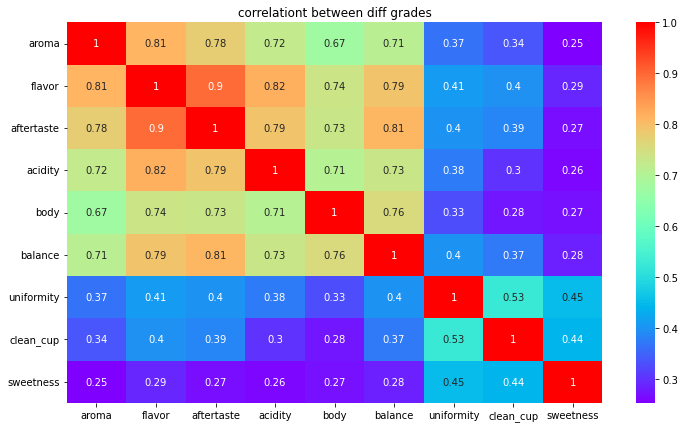

In [22]:
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(data_of_grade.corr(), annot=True, cmap="rainbow")
plt.title('correlationt between diff grades')

### 4. Який (якщо є) вплив кольору зерен на загальний сорт кави?

<AxesSubplot:xlabel='color', ylabel='count'>

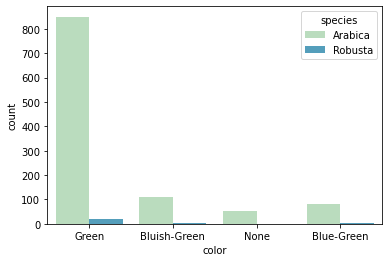

In [23]:
sns.countplot(x='color', hue='species', palette='GnBu', data=data)